In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

In [14]:
cols = ["fLength", "fWidth", "fSize", "fConc", "fConc1",
        "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]
df=pd.read_csv('magic04.data', names=cols)
df['class']=(df['class']=='g').astype(int)
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


In [15]:
x=df.drop(columns=['class']).values
y=df['class'].values

In [16]:
x_train, x_temp, y_train, y_temp= train_test_split(x,y, test_size=0.3, random_state=42)
x_test, x_val, y_test, y_val= train_test_split(x_temp,y_temp, test_size=0.3, random_state=42)

In [17]:
ros=RandomOverSampler()
x_train, y_train =ros.fit_resample(x_train,y_train)

In [18]:
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)
x_val_scaled=scaler.transform(x_val)

In [19]:
SVM_model=SVC()
SVM_model.fit(x_train_scaled, y_train)

SVC()

In [20]:
SVM_pred=SVM_model.predict(x_test_scaled)
print(classification_report(y_test,SVM_pred))

              precision    recall  f1-score   support

           0       0.81      0.78      0.79      1405
           1       0.88      0.90      0.89      2589

    accuracy                           0.86      3994
   macro avg       0.85      0.84      0.84      3994
weighted avg       0.86      0.86      0.86      3994



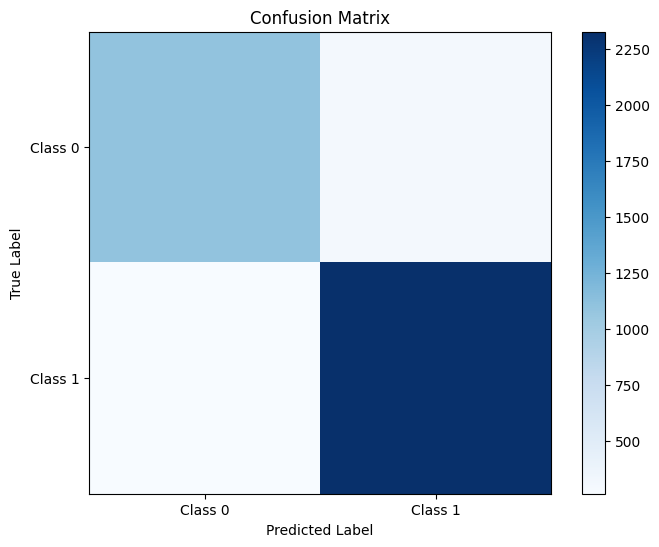

In [23]:
cm = confusion_matrix(y_test, SVM_pred)
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Class 0', 'Class 1'])
plt.yticks(tick_marks, ['Class 0', 'Class 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()